In [1]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 18.6 MB/s eta 0:00:03
   -- ------------------------------------- 2.9/38.5 MB 11.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/38.5 MB 11.2 MB/s eta 0:00:03
   -------- ------------------------------- 8.1/38.5 MB 11.5 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/38.5 MB 13.5 MB/s eta 0:00:02
   ---------------- ----------------------- 15.7/38.5 MB 14.2 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.5 MB 14.1 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/38.5 MB 14.7 MB/s eta 0:00:02
   ------------------------ --------------- 23.6/38.5 MB 13.7 MB/s eta 0:00:02
   ----------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_excel("../COPY_rural_development_dataset.xlsx", sheet_name="Data")

# Filtra solo l'Italia
ita_data = df[df['Country Name'] == 'Italy']

years = [col for col in ita_data.columns if col.isdigit()]

# Ciclo sulle variabili (righe)
for idx, riga in ita_data.iterrows():
    # Estraggo solo i valori degli anni
    valori = riga[years]
    
    # Elimino i NaN: tengo solo gli anni in cui ci sono dati
    valori_non_null = valori.dropna()

    x = valori_non_null.index.astype(int)
    y = valori_non_null.values
    
    value_name = riga["Indicator Name"]
    
    # Disegno con markers
    plt.plot(x, y, marker="o", linestyle="-", label=value_name)
    plt.title(f"{value_name} in Italy")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../COPY_rural_development_dataset.xlsx", sheet_name="Data")

# Filtra solo la Spagn
spain_data = df[df['Country Name'] == 'Spain']

# Colonne che rappresentano gli anni (stringhe numeriche)
years = [col for col in spain_data.columns if col.isdigit()]

# Ciclo sulle variabili (righe)
for idx, riga in spain_data.iterrows():
    # Estraggo solo i valori degli anni
    valori = riga[years]
    
    # Elimino i NaN: tengo solo gli anni in cui ci sono dati
    valori_non_null = valori.dropna()
    
    # Anni come numeri interi
    x = valori_non_null.index.astype(int)
    # Valori corrispondenti
    y = valori_non_null.values
    
    # Nome della variabile
    value_name = riga["Indicator Name"]
    
    # Disegno con markers
    plt.plot(x, y, marker="o", linestyle="-", label=value_name)
    plt.title(f"{value_name} in Spain")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis

            value
NaT          4.00
1960-01-01    NaN
1961-01-01  70.91
1962-01-01  72.59
1963-01-01  65.95


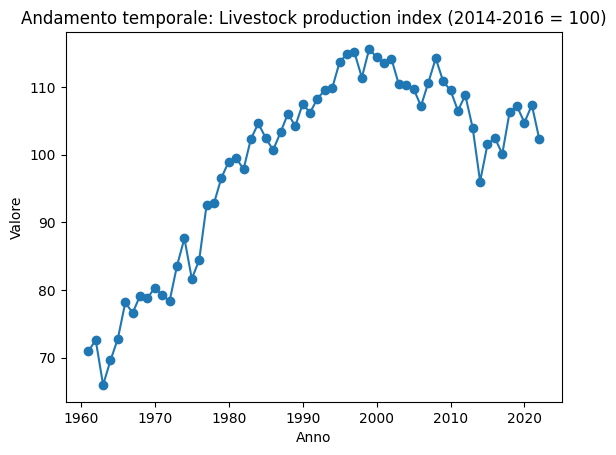

In [6]:
df = pd.read_excel("../COPY_rural_development_dataset.xlsx", sheet_name="Data")

# proxies = ['',
#         'Land area (sq. km)',
#         'Agricultural land (sq. km)',
#         'Fertilizer consumption (kilograms per hectare of arable land)']

proxy_name = "Livestock production index (2014-2016 = 100)"
country_name = "Italy"

# Filtra proxy e paese
row = df[(df['Indicator Name'] == proxy_name) & (df['Country Name'] == country_name)]

# Seleziona solo le colonne numeriche (anni)
values = row.select_dtypes(include=['number']).T
values.columns = ['value']

# Se ci sono intestazioni di anni come stringhe, le convertiamo in numeri o date
values.index = pd.to_datetime(values.index, errors='coerce', format='%Y')

# Visualizza il risultato
print(values.head())

# Grafico della serie temporale
plt.plot(values.index, values['value'], marker='o')
plt.title(f"Andamento temporale: {proxy_name}")
plt.xlabel("Anno")
plt.ylabel("Valore")
plt.show()